<a href="https://colab.research.google.com/github/egipot/Python_self_study/blob/main/Python_libraries_for_data_manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kdnuggets.com/essential-python-libraries-for-data-manipulation




> The must-know Python libraries to improve your data manipulation workflow.

> By Cornellius Yudha Wijaya, KDnuggets Technical Content Specialist on May 20, 2024 in Python





# 1. Numpy

In [7]:
# create a simple array and perform array operations

import numpy as np

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
c = a + b
print(c)



[5 7 9]


In [8]:
#perform basic statistics calculations with NumPy
data = np.array([1, 2, 3, 4, 5, 6, 7])
mean = np.mean(data)
median = np.median(data)
std_dev = np.std(data)

print(f"The data mean:{mean}, median:{median} and standard deviation: {std_dev}")

The data mean:4.0, median:4.0 and standard deviation: 2.0


In [9]:
#perform linear algebra operations such as matrix calculation
x = np.array([[1, 2], [3, 4]])
y = np.array([[5, 6], [7, 8]])
dot_product = np.dot(x, y)
dot_product

# performing dot product manually:
# (1*5 + 2*7) (1*6 + 2*8)
# (3*5 + 4*7) (3*6 + 4*8)

# 5+14  6+16
# 15+28 18+32

array([[19, 22],
       [43, 50]])

In [10]:
# https://numpy.org/
# Create a 2-D array: in a range of 20 elements, shape the array into 4 rows and 5 columns

x = np.arange(20, dtype=np.int64).reshape(4, 5)

#set 0 as every second element in some rows
x[1:, ::2] = 0
x


array([[ 0,  1,  2,  3,  4],
       [ 0,  6,  0,  8,  0],
       [ 0, 11,  0, 13,  0],
       [ 0, 16,  0, 18,  0]])

In [11]:
#and find max per row:
x.max(axis=1)


array([ 4,  8, 13, 18])

In [12]:
# Generate normally distributed random numbers:
rng = np.random.default_rng()
samples = rng.normal(size=2500)
samples

array([-2.1775209 ,  0.68399955,  1.51944382, ..., -1.51588808,
       -0.94430196, -0.73696182])

# 2. Pandas

> Pandas allows the user to perform data operations and analyze data from various input formats such as CSV, Excel, SQL databases, or JSON.



In [13]:
# https://pandas.pydata.org/docs/
# initiate a dataset from Numpy and get a DataFrame object that shows the top 5 rows

import numpy as np
import pandas as pd

np.random.seed(0)

months = pd.date_range(start='2023-01-01', periods=12, freq='M')
sales = np.random.randint(10000, 50000, size=12)
transactions = np.random.randint(50, 200, size=12)

In [15]:
months

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31'],
              dtype='datetime64[ns]', freq='M')

In [14]:
sales

array([12732, 31243, 40403, 42103, 30757, 24935, 25430, 49512, 24650,
       27089, 42230, 28983])

In [16]:
transactions

array([137, 138, 131,  75, 127, 122,  59, 198, 165, 129, 132, 149])

In [17]:
#store the previously generated dataset into a set
data = {
'Month': months,
'Sales': sales,
'Transactions': transactions
}
df = pd.DataFrame(data)
df.head()

,Month,Sales,Transactions
0,2023-01-31,12732,137
1,2023-02-28,31243,138
2,2023-03-31,40403,131
3,2023-04-30,42103,75
4,2023-05-31,30757,127


In [18]:
#show the full dataset
df

,Month,Sales,Transactions
0,2023-01-31,12732,137
1,2023-02-28,31243,138
2,2023-03-31,40403,131
3,2023-04-30,42103,75
4,2023-05-31,30757,127
5,2023-06-30,24935,122
6,2023-07-31,25430,59
7,2023-08-31,49512,198
8,2023-09-30,24650,165
9,2023-10-31,27089,129


In [19]:
#filtering according to a criteria

df[df['Transactions'] <100]

,Month,Sales,Transactions
3,2023-04-30,42103,75
6,2023-07-31,25430,59


In [20]:
#perform calculations
total_sales = df['Sales'].sum()
average_transactions = df['Transactions'].mean()

print(f'The total sales is $ {total_sales} and the average amount of transactions is $ {round(average_transactions,2)}')

The total sales is $ 380067 and the average amount of transactions is $ 130.17


In [21]:
#perform data cleaning

#removes the rows thatcontains NULL values:
df = df.dropna()

#replace NaN values with a specific value instead
df = df.fillna(0) #or
df = df.fillna(df.mean())

# 3. Polars



> Data manupulation for large datasets



In [22]:
df

,Month,Sales,Transactions
0,2023-01-31,12732,137
1,2023-02-28,31243,138
2,2023-03-31,40403,131
3,2023-04-30,42103,75
4,2023-05-31,30757,127
5,2023-06-30,24935,122
6,2023-07-31,25430,59
7,2023-08-31,49512,198
8,2023-09-30,24650,165
9,2023-10-31,27089,129


In [23]:
# https://pola.rs/
# https://docs.pola.rs/user-guide/concepts/data-structures/#dataframe

import polars as pl

#generate a 1-dimensional data structure = series
s = pl.Series("a", [1, 2, 3, 4, 5])
s

a
i64
1
2
3
4
5


In [24]:
#generate a 2-dimensional data structure = DataFrame

from datetime import datetime

df_pl = pl.DataFrame(
    {
        "integer": [1, 2, 3, 4, 5],
        "date": [
            datetime(2022, 1, 1),
            datetime(2022, 1, 2),
            datetime(2022, 1, 3),
            datetime(2022, 1, 4),
            datetime(2022, 1, 5),
        ],
        "float": [4.0, 5.0, 6.0, 7.0, 8.0],
    }
)

df_pl

integer,date,float
i64,datetime[μs],f64
1,2022-01-01 00:00:00,4.0
2,2022-01-02 00:00:00,5.0
3,2022-01-03 00:00:00,6.0
4,2022-01-04 00:00:00,7.0
5,2022-01-05 00:00:00,8.0


In [25]:
df_pl.describe()

describe,integer,date,float
str,f64,str,f64
"""count""",5.0,"""5""",5.0
"""null_count""",0.0,"""0""",0.0
"""mean""",3.0,null,6.0
"""std""",1.581139,null,1.581139
"""min""",1.0,"""2022-01-01 00:…",4.0
"""25%""",2.0,null,5.0
"""50%""",3.0,null,6.0
"""75%""",4.0,null,7.0
"""max""",5.0,"""2022-01-05 00:…",8.0


# 4. Vaex



> Vaex is similar to Polars as the library is developed specifically for considerable dataset data manipulation. However, there are differences in the way they process the dataset. For example, Vaex utilize memory-mapping techniques, while Polars focus on a multi-threaded approach.

> Vaex is optimally suitable for datasets that are way bigger than what Polars intended to use. While Polars is also for extensive dataset manipulation processing, the library is ideally on datasets that still fit into memory size. At the same time, Vaex would be great to use on datasets that exceed the memory.





In [33]:
pip install vaex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.7/260.7 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 54.0 MB/s eta 0:00:00

In [26]:
# https://vaex.io/
# https://vaex.io/docs/tutorials.html

import vaex
import numpy as np
x = np.arange(5)
y = x**2
df_v = vaex.from_arrays(x=x, y=y)
df_v

#,x,y
0,0,0
1,1,1
2,2,4
3,3,9
4,4,16


In [27]:
# plotting

# The simplest visualization is a 1-D plot using DataFrame.viz.histogram. Here, we only show 99.7% of the data.

df_v = vaex.example()

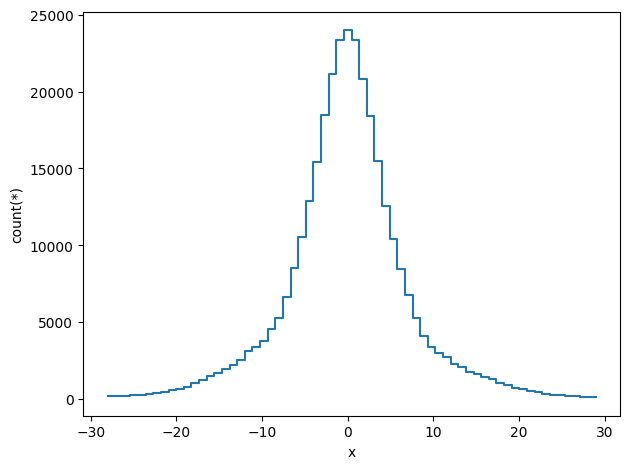

In [28]:
df_v.viz.histogram(df_v.x, limits='99.7%')

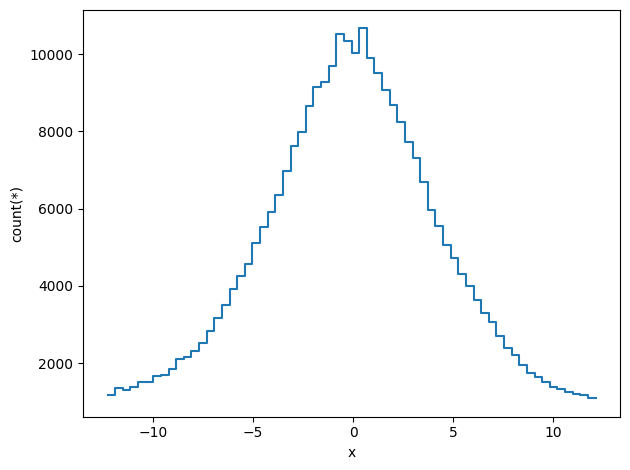

In [30]:
# plotting a lower limit of 90%

df_v.viz.histogram(df_v.x, limits='90%')

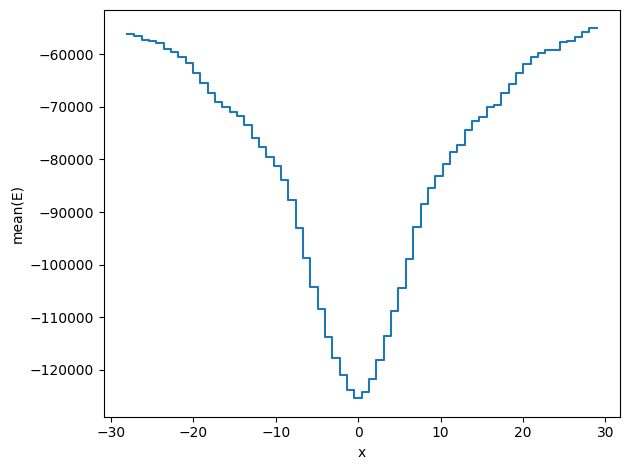

In [31]:
#plotting a specified statistic expression(what=), for example mean(E)
df_v.viz.histogram(df_v.x, what='mean(E)', limits='99.7%');

In [32]:
# comparing time of computation using pandas vs. vaex

# https://www.geeksforgeeks.org/introduction-to-vaex-in-python/

%time df_pandas = pd.read_csv('./sample_data/mnist_test.csv')

CPU times: user 568 ms, sys: 74.8 ms, total: 643 ms
Wall time: 641 ms


In [33]:
%time df_vaex = vaex.open('./sample_data/mnist_test.csv')

CPU times: user 527 ms, sys: 88.4 ms, total: 615 ms
Wall time: 554 ms


In [34]:
print("Size =")
print(df_pandas.shape)
print(df_vaex.shape)

Size =
(9999, 785)
(9999, 73)


In [37]:
df_vaex.describe

<bound method DataFrame.describe of #      7    0    84    185    159    151    60    36    222    254    241    198    170    52    67    114    72    163    227    225    250    229    140    17    66    14    59    21    236    106    83    253    209    18    22    233    255    129    238    44    249    62    133    187    5    9    205    248    58    126    182    75    251    240    57    19    221    166    3    203    219    35    38    77    31    224    115    1    61    242    121    40    207
0      2    0    0     77     251    210    25    0     0      0      0      0      0      0     0     0      0     0      0      117    10     0      0      0     76    247   0     0     0      0      0     0      0      0     0     0      0      0      0      0     0      0     0      0      0    0    0      0      0     0      0      0     0      0      0     20    20     5      253  253    253    168   253   253   123   123    253    253  0     0      0      0     0
1      1    0    0     0      0      0      0     0     0      0      0      0      0      0     0     0      0     0      0      0      11     0      0      0     0     0     0     0     0      0      0     0      0      0     0     0      0      0      0      0     0      0     0      0      0    0    0      0      0     0      0      142   0      0      0     254   66     0      251  254    0      0     254   0     215   254    0      0    0     0      0      0     0
2      0    0    0     0      0      0      110   190   0      0      251    251    0      0     0     0      0     255    253    253    253    253    0      251   251   251   128   251   251    0      230   251    243    113   0     109    251    0      200    253   0      202   0      109    251  0    21     63     231   0      251    0     182    221    251   253   253    253    251  251    253    251   251   253   251   251    251    253  0     0      0      0     0
3      4    0    0     0      0      4      195   231   0      0      134    0      252    21    0     0      45    217    12     0      0      0      21     0     0     0     0     18    255    21     141   253    189    5     32    232    250    134    211    0     169    167   22     253    107  164  195    252    252   231    252    0     0      161    252   0     0      127    0    0      0      128   0     0     0     0      0      0    0     0      0      0     0
4      1    0    0     0      0      0      0     0     0      0      0      0      0      0     0     0      0     0      0      0      250    0      0      0     0     0     180   0     0      0      0     0      0      0     0     0      0      0      0      0     0      0     0      0      0    154  0      0      0     53     0      210   0      0      0     254   131    0      254  234    0      0     254   0     211   254    0      0    0     26     0      0     0
...    ...  ...  ...   ...    ...    ...    ...   ...   ...    ...    ...    ...    ...    ...   ...   ...    ...   ...    ...    ...    ...    ...    ...    ...   ...   ...   ...   ...   ...    ...    ...   ...    ...    ...   ...   ...    ...    ...    ...    ...   ...    ...   ...    ...    ...  ...  ...    ...    ...   ...    ...    ...   ...    ...    ...   ...   ...    ...    ...  ...    ...    ...   ...   ...   ...   ...    ...    ...  ...   ...    ...    ...   ...
9,994  2    0    64    255    255    255    255   255   128    255    191    128    128    0     128   255    255   128    0      0      255    255    0      0     0     0     255   255   255    0      255   255    64     0     255   255    191    255    0      0     255    0     255    0      0    255  255    64     0     255    0      255   255    255    191   255   255    255    255  255    255    255   255   255   255   255    128    0    0     0      0      0     0
9,995  3    0    58    240    254    254    254   254   66     246    160    130    0      0     0     183    222   50     0      77     53     0      0      0 

# 5. CuPy



> CuPy is an open-source library that enables GPU-accelerated computing in Python. It is CuPy that was designed for the NumPy and SciPy replacement if you need to run the calculation within NVIDIA CUDA or AMD ROCm platforms.

> This makes CuPy great for applications that require intense numerical computation and need to use GPU acceleration. CuPy could utilize the parallel architecture of GPU and is beneficial for large-scale computations.





In [ ]:
import cupy as cp
x = cp.arange(10)
y = cp.array([2] * 10)

z = x * y

print(cp.asnumpy(z))